In [2]:
# Necessary Libraries
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
file_path = '/Users/don/Downloads/traffic.mat'
data = scipy.io.loadmat(file_path)



In [4]:

# Extract and rename the relevant data
traffic_input_train = data['tra_X_tr']  # Training input data
traffic_output_train = data['tra_Y_tr']  # Training output data
traffic_input_test = data['tra_X_te']  # Test input data
traffic_output_test = data['tra_Y_te']  # Test output data
adjacency_matrix = data['tra_adj_mat']  # Adjacency matrix

# Convert to pandas DataFrame for easier handling
traffic_output_train_df = pd.DataFrame(traffic_output_train)

## Exploratory Data Analysis

In [5]:
# Display the first 5 rows of the DataFrame
traffic_output_train_df.head(3)


,0,1,2,3,4,5,6,7,8,9,...,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260
0,0.050911,0.047641,0.044839,0.059785,0.062588,0.063989,0.088277,0.113498,0.122840,0.125175,...,0.071462,0.080336,0.098085,0.147595,0.184960,0.248015,0.260159,0.371322,0.424568,0.422700
1,0.046240,0.049510,0.052312,0.046707,0.057450,0.055582,0.077534,0.094348,0.097151,0.107426,...,0.054180,0.081738,0.074731,0.120504,0.189164,0.254554,0.274638,0.370855,0.438113,0.501168
2,0.050444,0.044372,0.050444,0.050444,0.043438,0.066791,0.069127,0.070061,0.095750,0.079869,...,0.044372,0.068660,0.072863,0.104157,0.152732,0.200374,0.257356,0.255021,0.401681,0.379262


In [6]:
# Check for missing values in each column
missing_values = traffic_output_train_df.isnull().sum()
print(sum(missing_values))


0


In [7]:
# View basic information about the DataFrame
traffic_output_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 1261 entries, 0 to 1260
dtypes: float64(1261)
memory usage: 354.8 KB


In [8]:
# Descriptive statistics
traffic_descriptive_stats = traffic_output_train_df.describe()
print(traffic_descriptive_stats)



            0          1          2          3          4          5     \
count  36.000000  36.000000  36.000000  36.000000  36.000000  36.000000   
mean    0.060719   0.061251   0.061926   0.065520   0.063820   0.071462   
std     0.036589   0.039999   0.036568   0.041838   0.041897   0.046258   
min     0.002802   0.002335   0.000000   0.003737   0.005605   0.003270   
25%     0.033512   0.028258   0.033629   0.030476   0.027207   0.034680   
50%     0.046707   0.049276   0.053246   0.051144   0.051845   0.059785   
75%     0.091780   0.097968   0.095983   0.102055   0.101588   0.098085   
max     0.140589   0.137786   0.127511   0.140589   0.138720   0.159738   

            6          7          8          9     ...       1251       1252  \
count  36.000000  36.000000  36.000000  36.000000  ...  36.000000  36.000000   
mean    0.077651   0.093142   0.102704   0.105169  ...   0.074744   0.086901   
std     0.052580   0.063517   0.064368   0.061947  ...   0.046900   0.057532   
min 

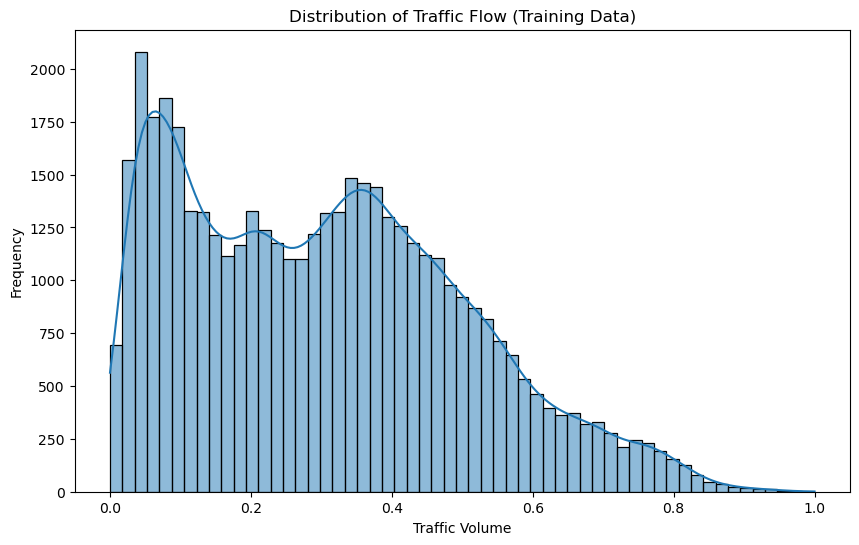

In [9]:
# Plotting the distribution of traffic flow
plt.figure(figsize=(10, 6))
sns.histplot(traffic_output_train.flatten(), kde=True)
plt.title('Distribution of Traffic Flow (Training Data)')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_matrix = traffic_output_train_df.corr()
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix of Traffic Volumes')
#plt.show()


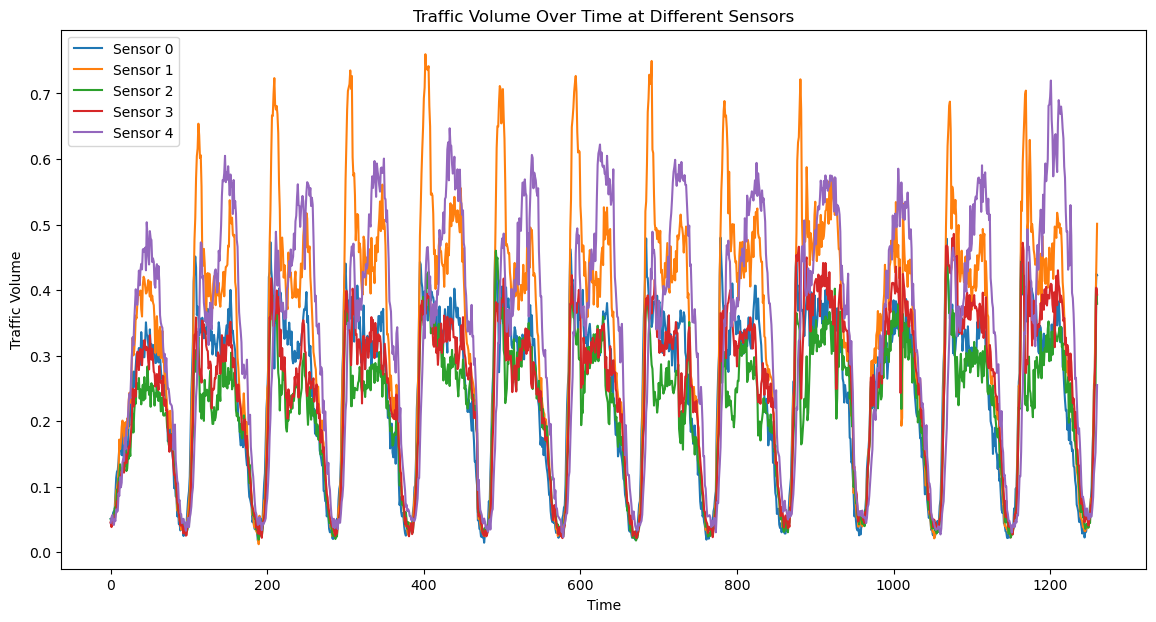

In [14]:
plt.figure(figsize=(14, 7))
for i in range(5):  # Change range to visualize more locations if needed
    plt.plot(traffic_output_train_df.iloc[i, :], label=f'Sensor {i}')
plt.title('Traffic Volume Over Time at Different Sensors')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


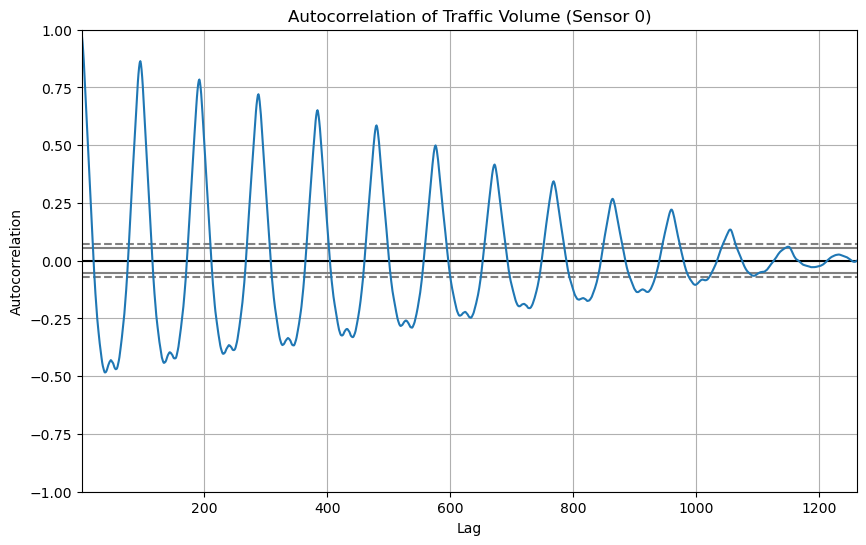

In [15]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(traffic_output_train_df.iloc[0, :])  # Autocorrelation for the first sensor
plt.title('Autocorrelation of Traffic Volume (Sensor 0)')
plt.show()


In [41]:
#plt.figure(figsize=(14, 8))
#sns.heatmap(traffic_output_train_df, cmap='viridis', cbar=True)
#plt.title('Heatmap of Traffic Volumes Over Time')
#plt.xlabel('Time')
#plt.ylabel('Sensor')
#plt.show()


## Data Preprocessing

ADF Statistic: -23.280265833229905
p-value: 0.0


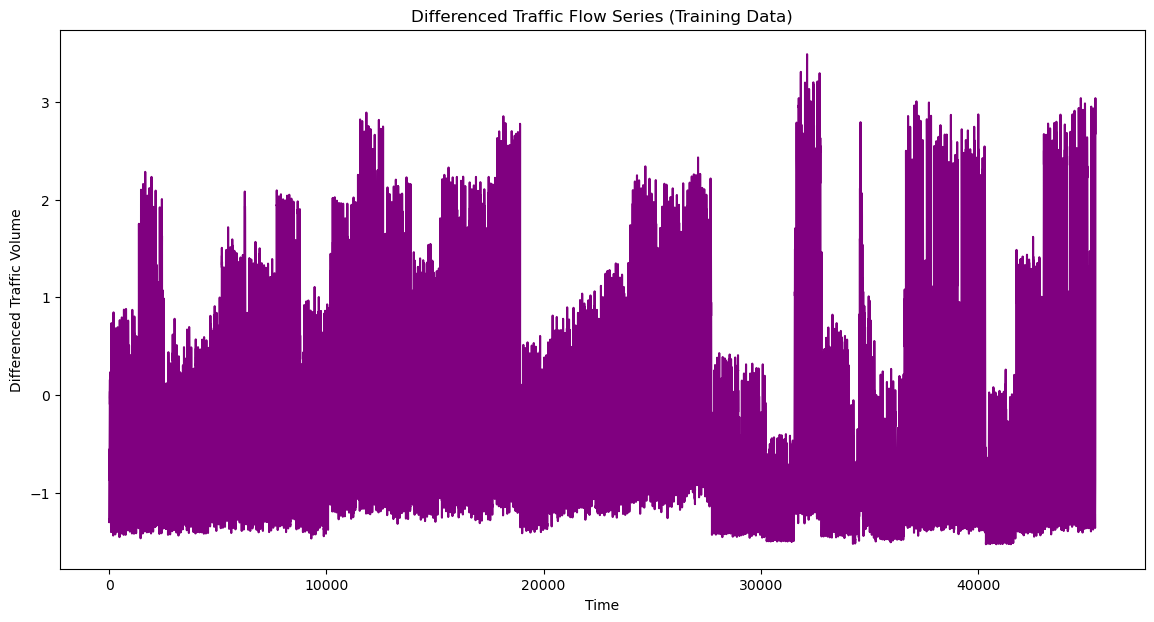

In [21]:
# Necessary Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Flattening the output for time series modeling
traffic_output_train_flat = traffic_output_train.flatten()
traffic_output_test_flat = traffic_output_test.flatten()

# Scaling the data using StandardScaler (optional if your model needs it)
scaler = StandardScaler()
traffic_output_train_scaled = scaler.fit_transform(traffic_output_train_flat.reshape(-1, 1))
traffic_output_test_scaled = scaler.transform(traffic_output_test_flat.reshape(-1, 1))

# Check for stationarity (using Augmented Dickey-Fuller test)
adf_result = adfuller(traffic_output_train_scaled.flatten())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If the series is not stationary, difference the series to make it stationary
if adf_result[1] > 0.05:
    diff_traffic_output_train = np.diff(traffic_output_train_scaled.flatten(), n=1)
else:
    diff_traffic_output_train = traffic_output_train_scaled.flatten()

# Visualize the differenced series to check stationarity
plt.figure(figsize=(14, 7))
plt.plot(diff_traffic_output_train, color='purple')
plt.title('Differenced Traffic Flow Series (Training Data)')
plt.xlabel('Time')
plt.ylabel('Differenced Traffic Volume')
plt.show()


In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Select the data for one sensor (e.g., the first one)
sensor_data = pd.Series(diff_traffic_output_train)  # Convert array to series

# Fit the ARIMA model (ARIMA(p,d,q) where p=1, d=1, q=0 as an example)
model = ARIMA(sensor_data, order=(1, 1, 0))
model_fit = model.fit()

# Model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45396
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8251.420
Date:                Sun, 18 Aug 2024   AIC                         -16498.840
Time:                        02:52:51   BIC                         -16481.394
Sample:                             0   HQIC                        -16493.350
                              - 45396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0063      0.002     -2.734      0.006      -0.011      -0.002
sigma2         0.0407   7.46e-05    545.301      0.000       0.041       0.041
Ljung-Box (L1) (Q):                   0.01   Jarque-

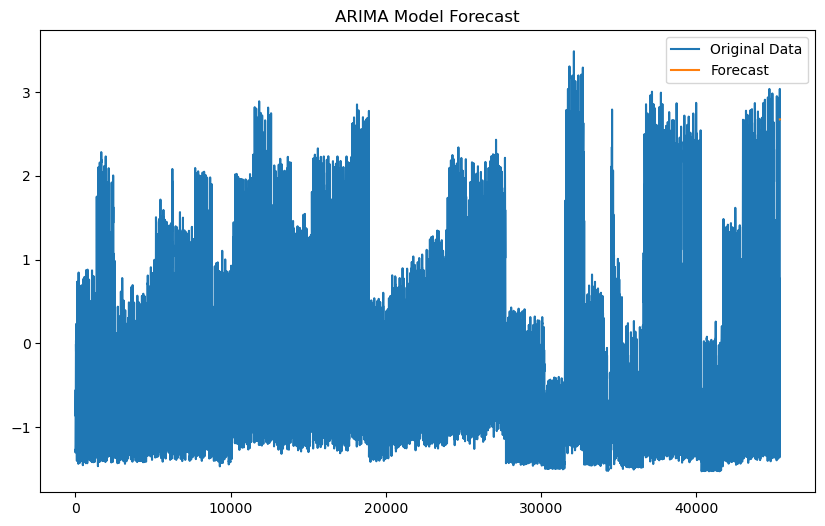

In [23]:
# Forecast the next 10 time steps
forecast = model_fit.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(sensor_data, label='Original Data')
plt.plot(range(len(sensor_data), len(sensor_data) + 10), forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error

# Example: Assuming we have a validation set (you can split your data to create this)
val_data = traffic_output_test_flat[:len(forecast)]  # Adjust based on your data

# Calculate the Mean Squared Error (MSE) between the forecast and actual values
mse = mean_squared_error(val_data, forecast)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5.2718227325664815


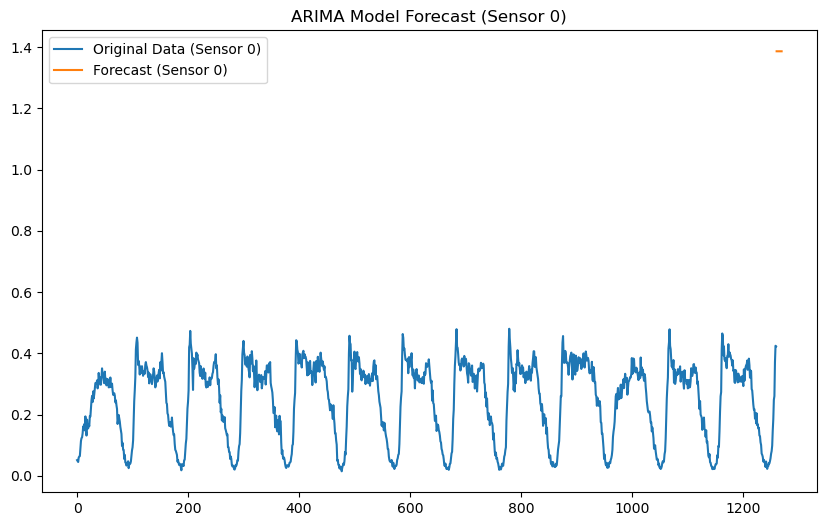

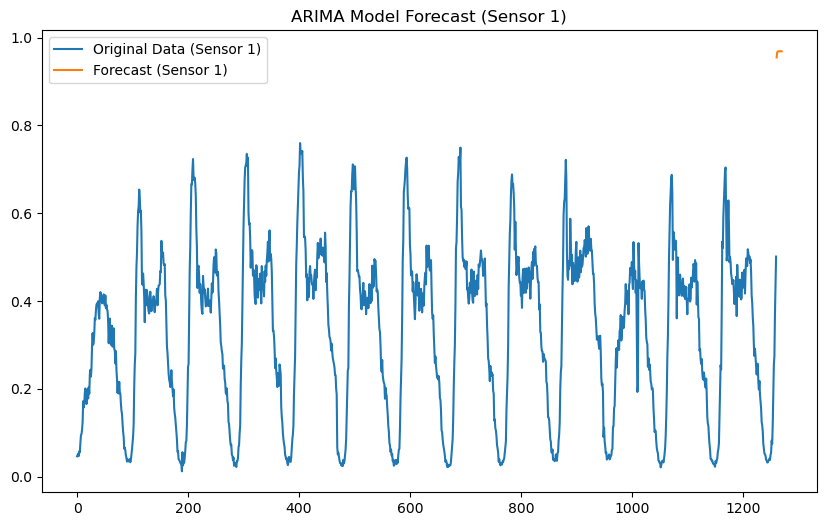

/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


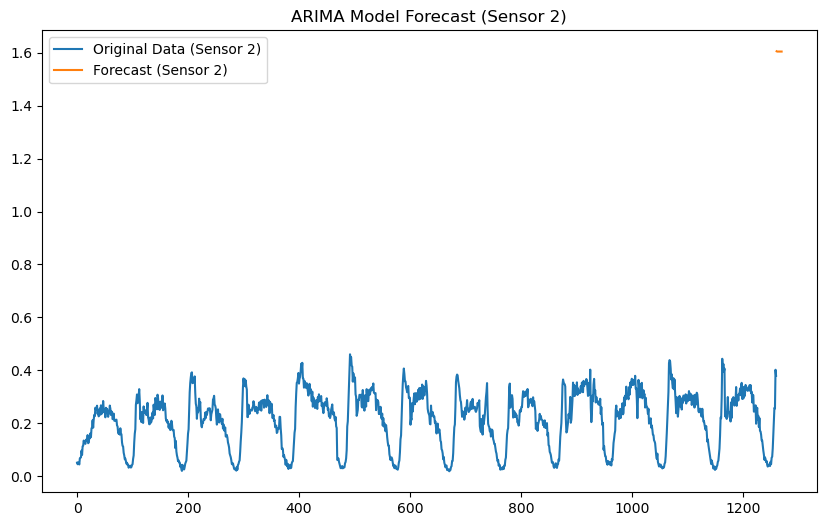

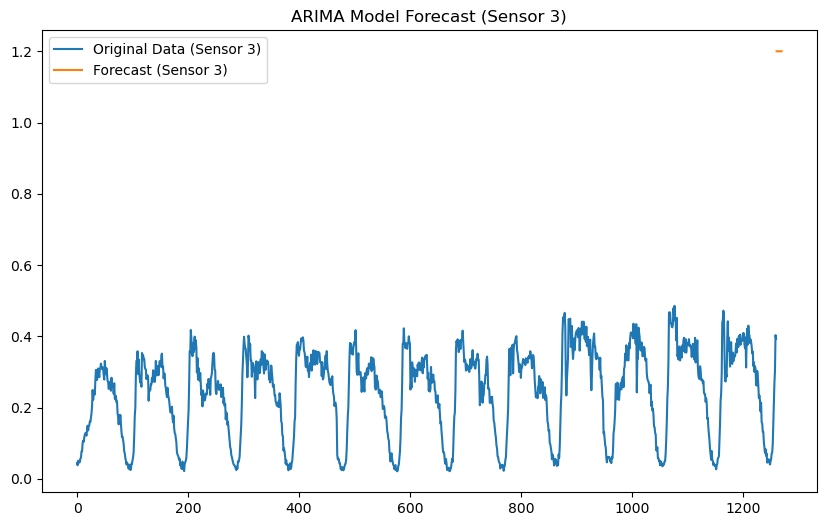

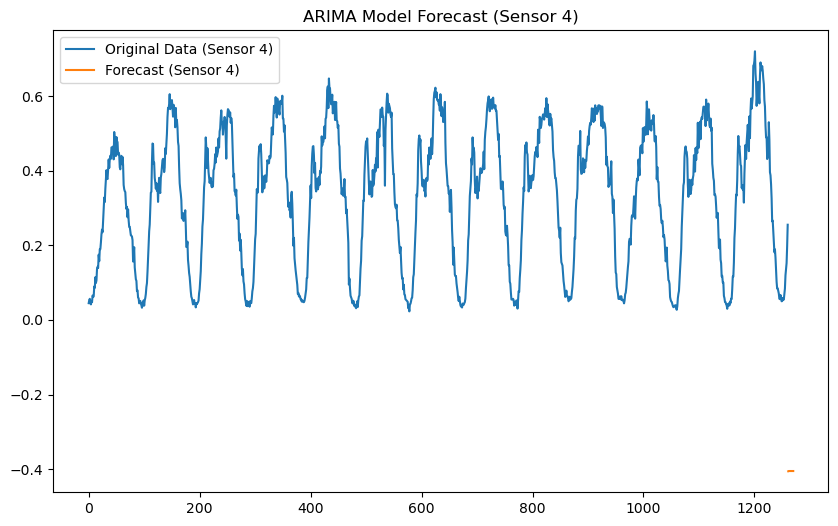

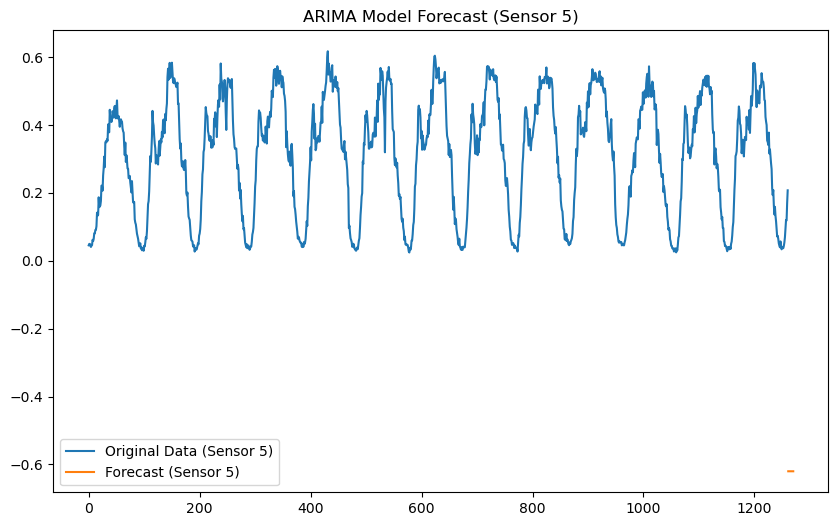

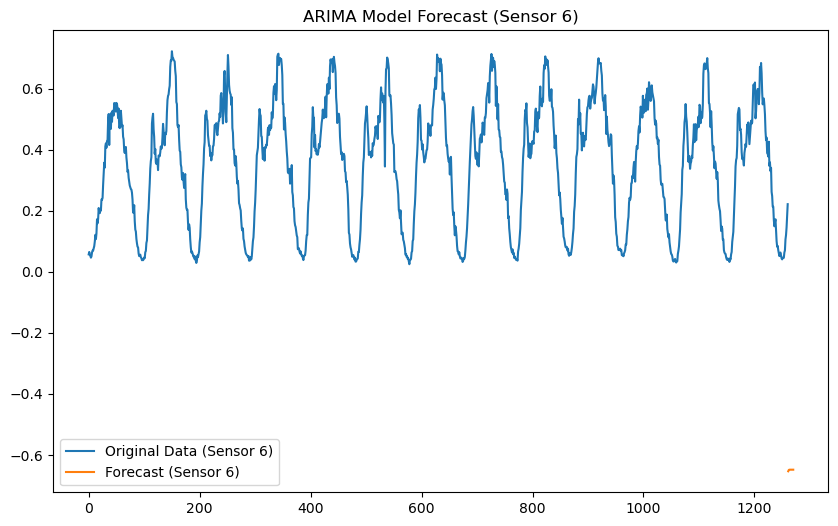

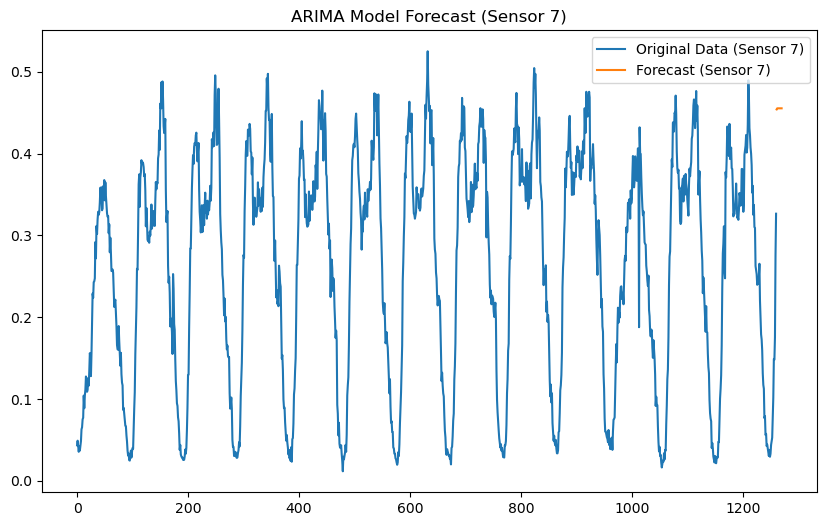

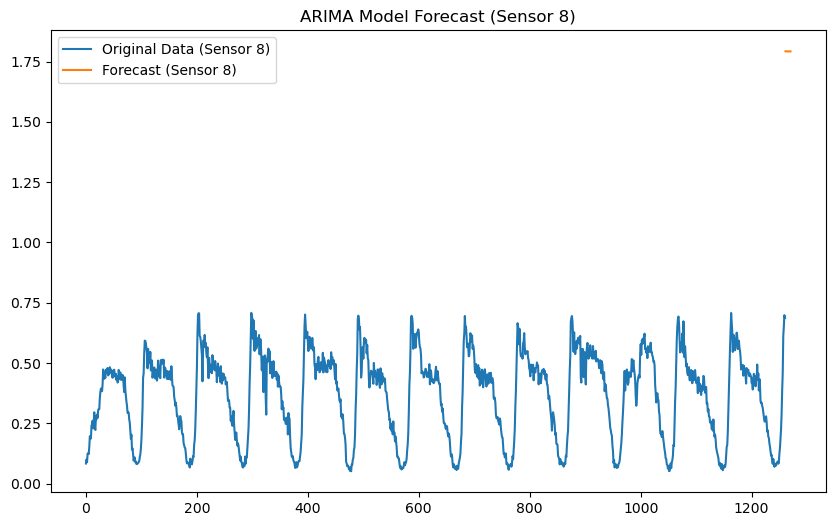

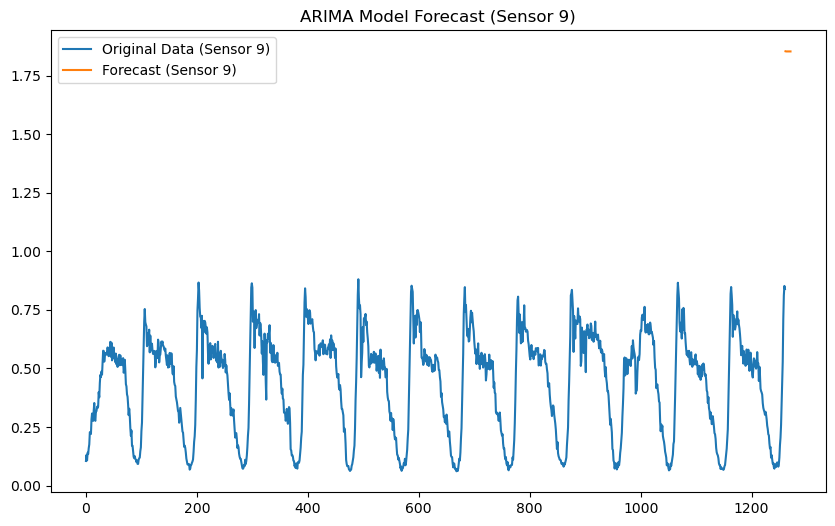

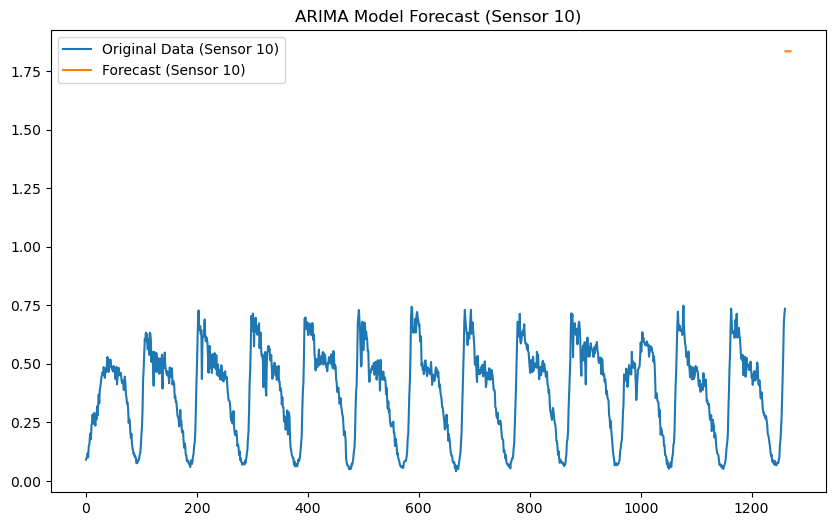

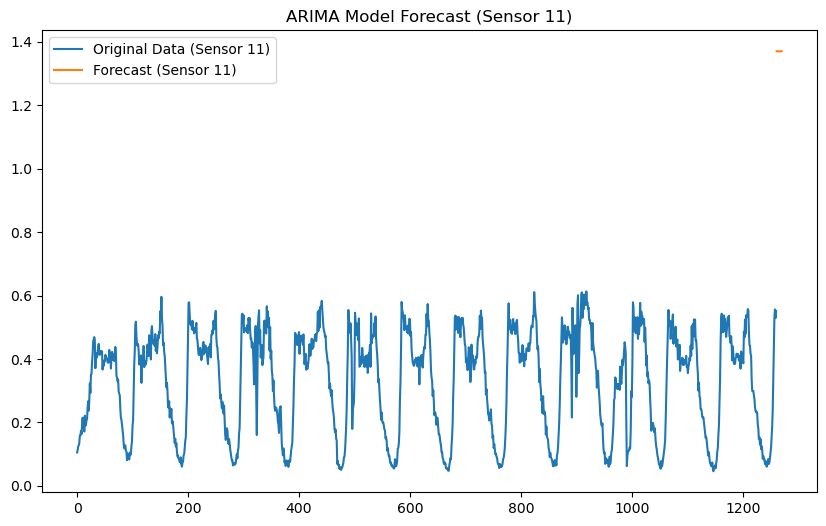

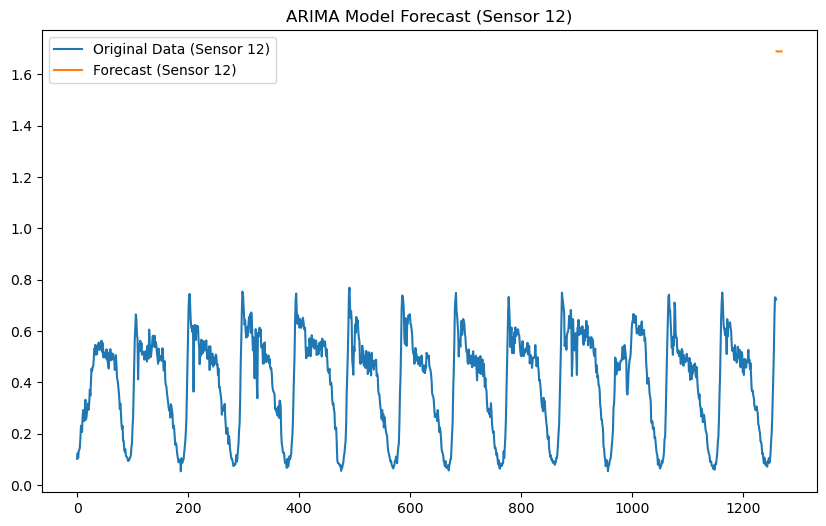

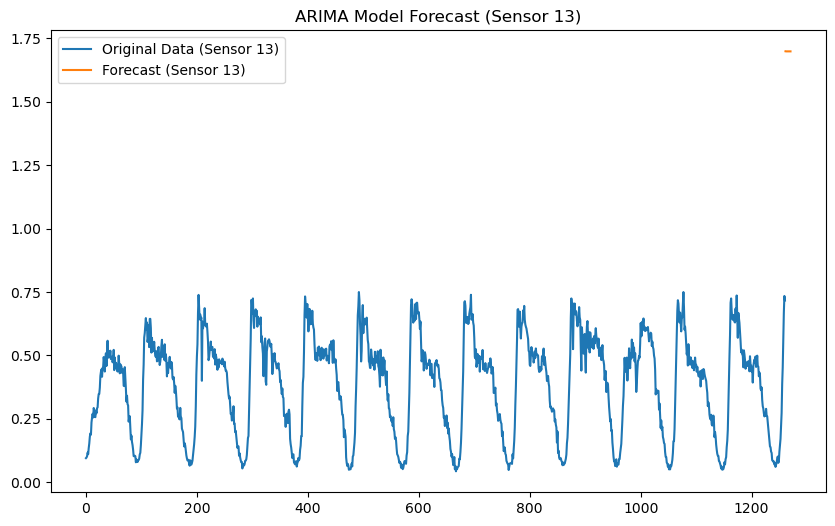

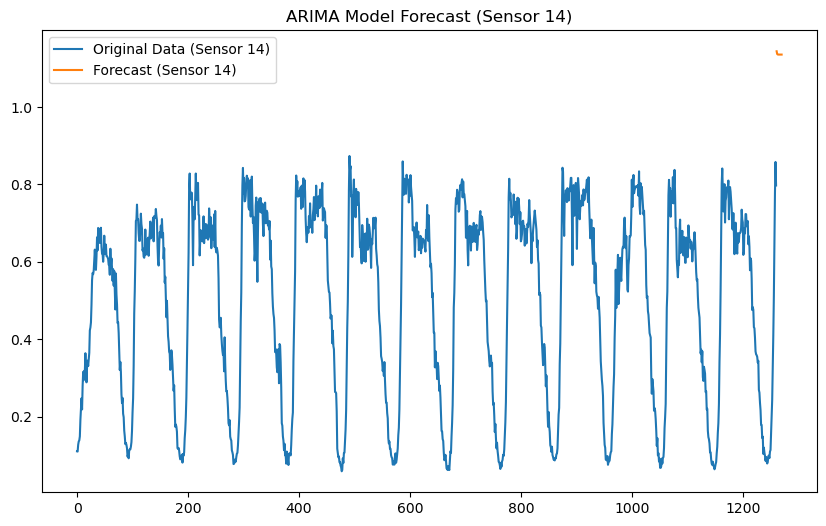

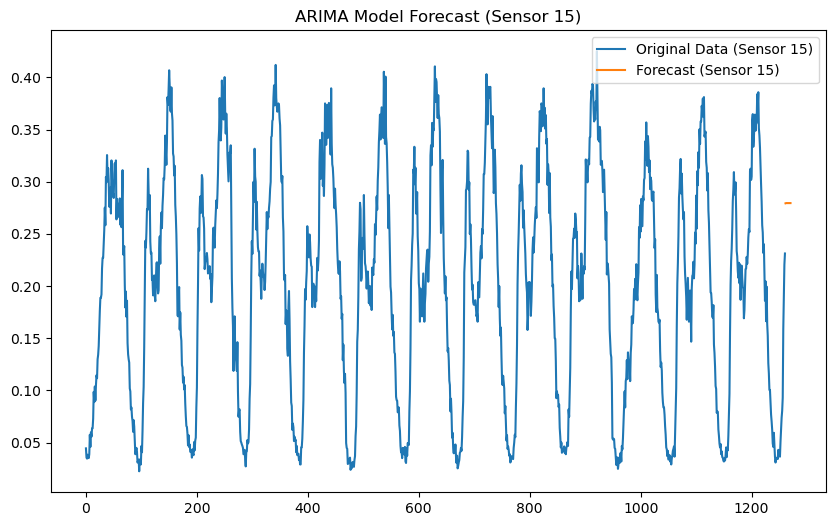

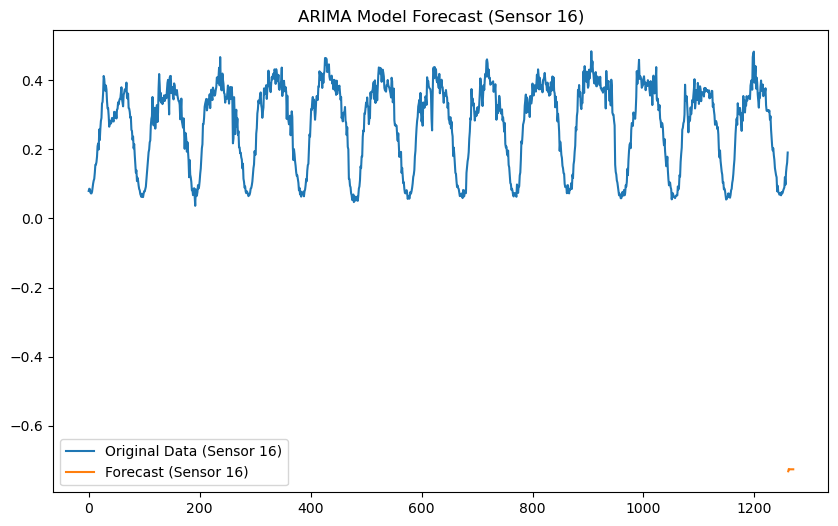

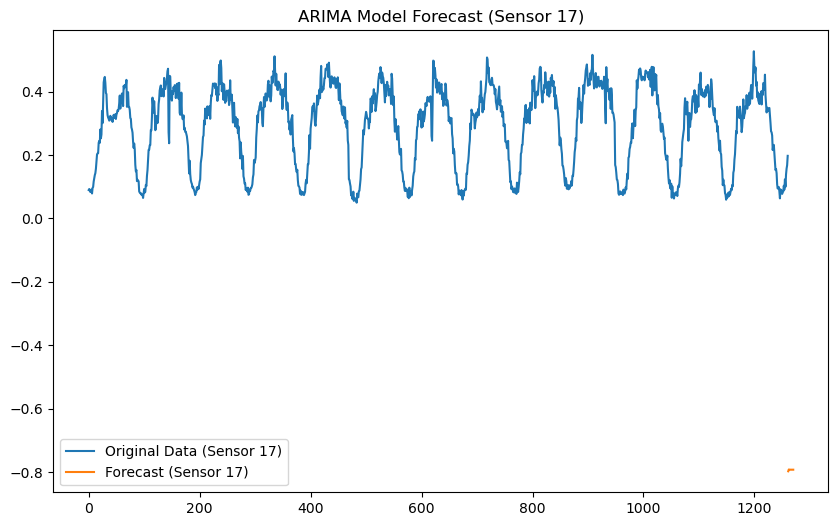

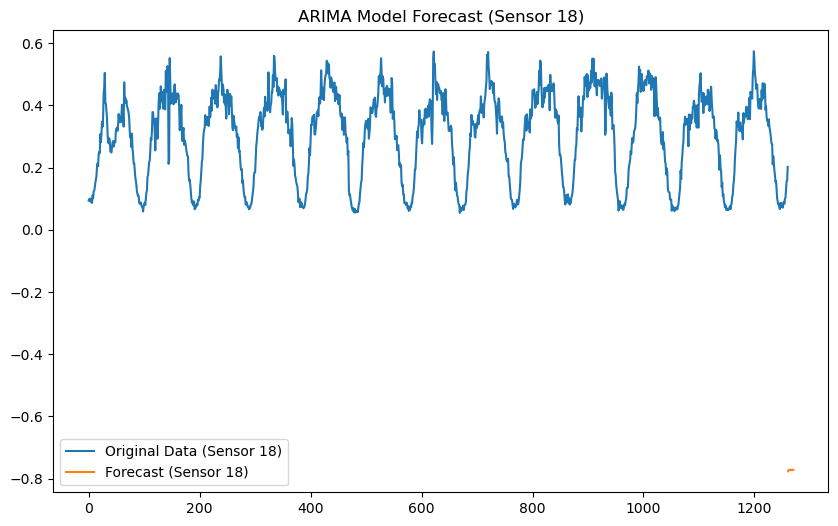

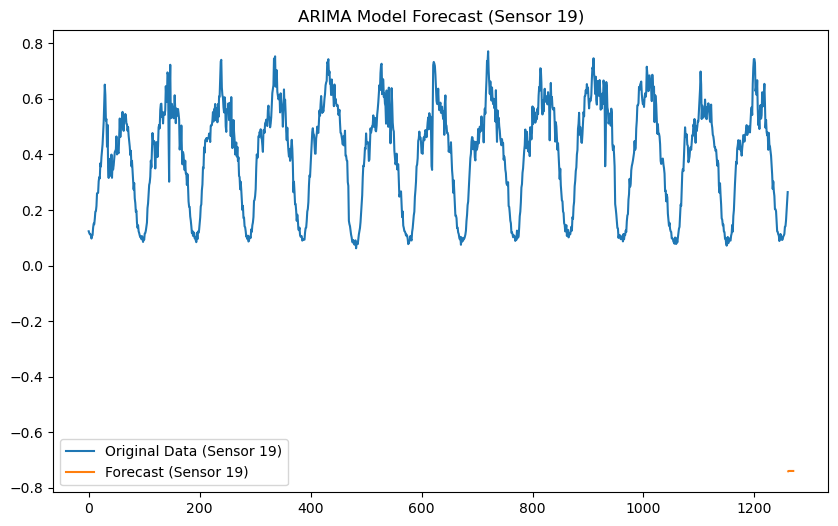

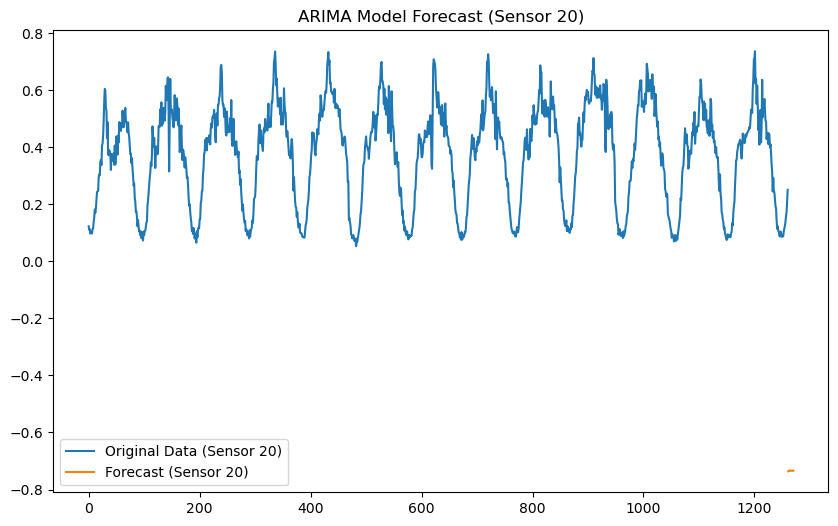

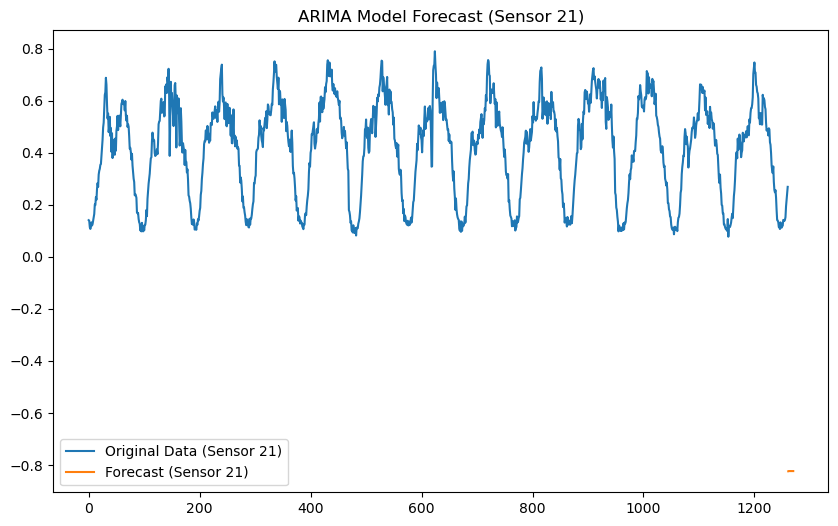

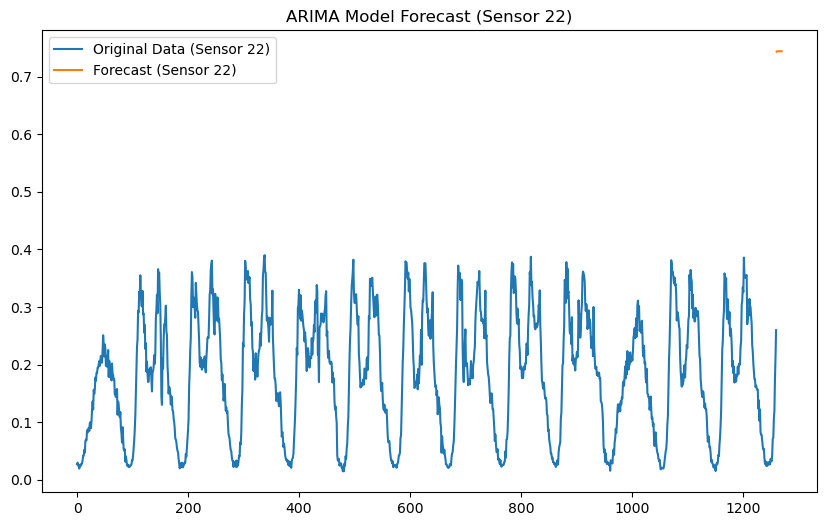

/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


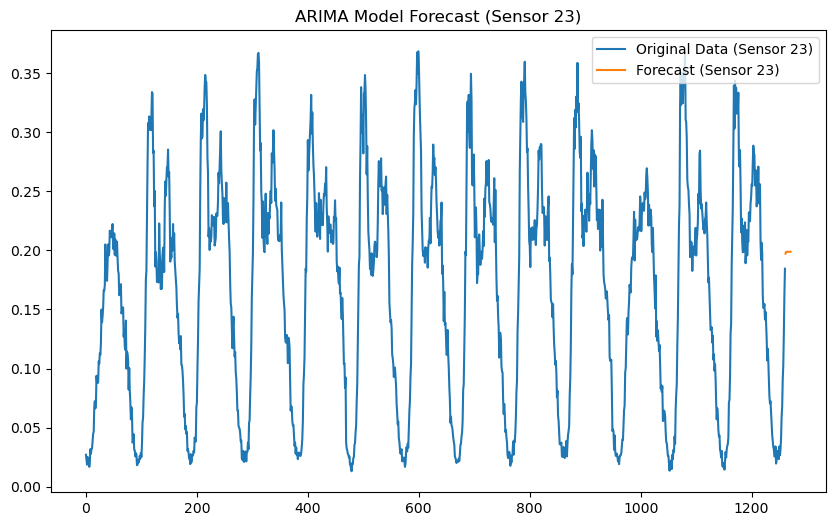

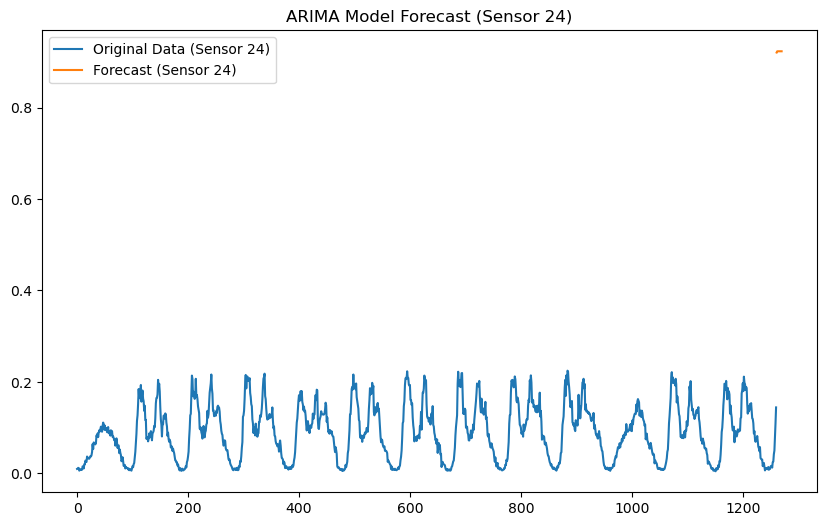

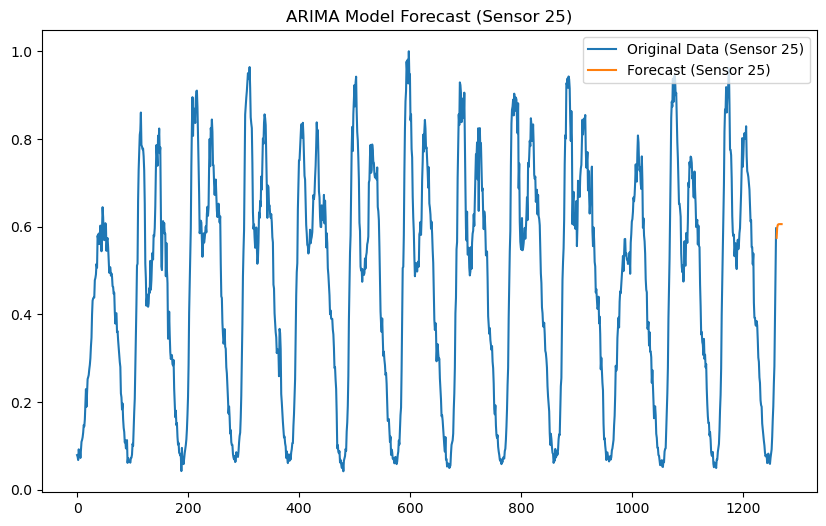

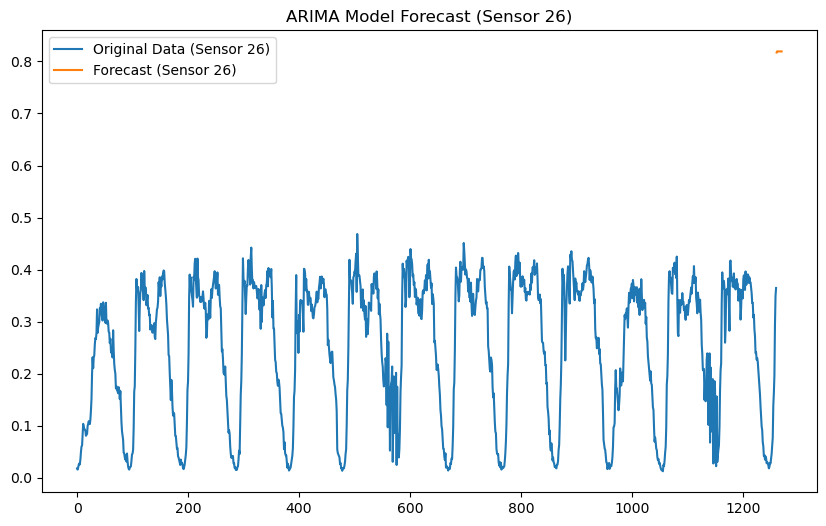

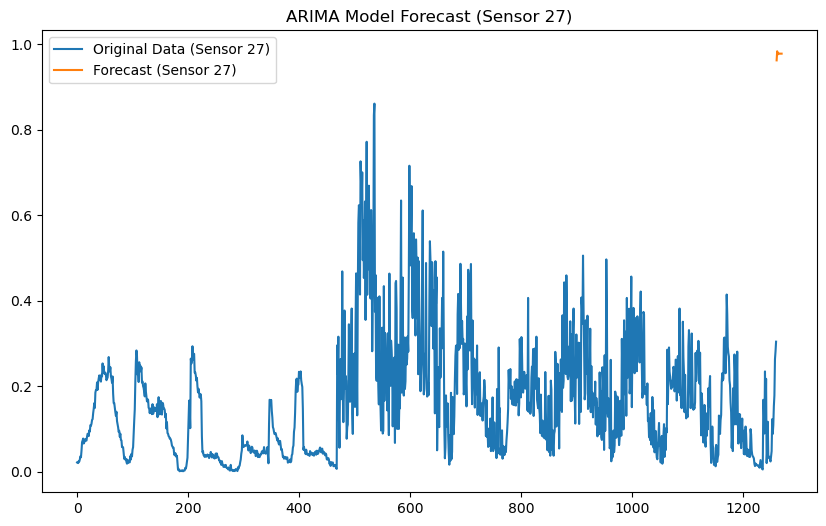

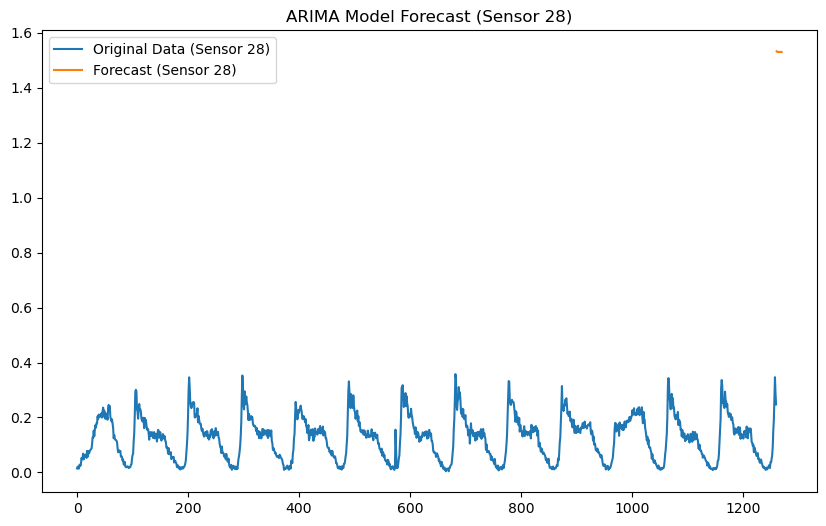

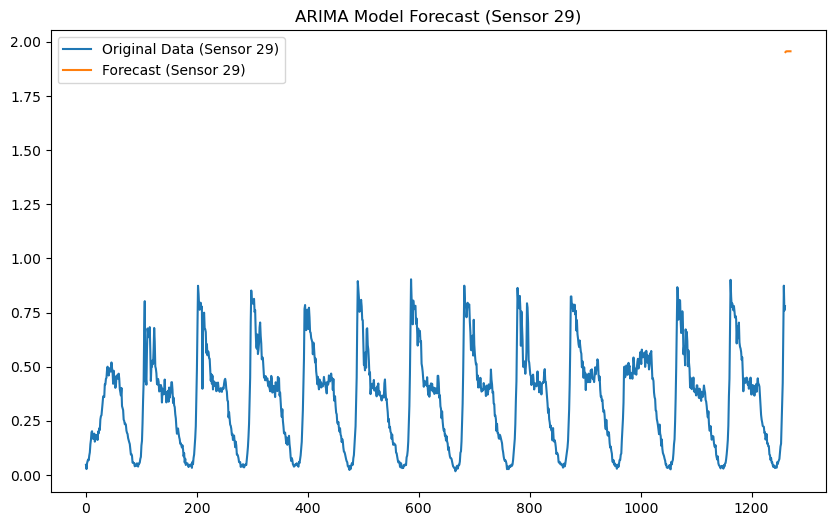

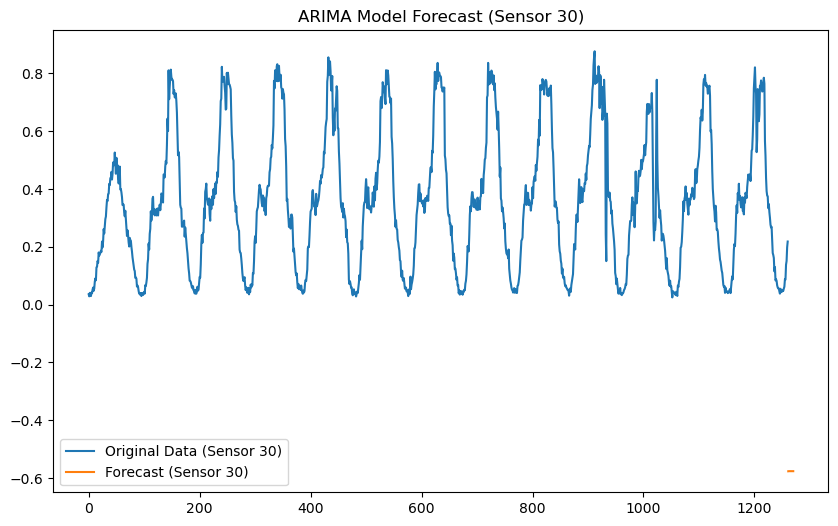

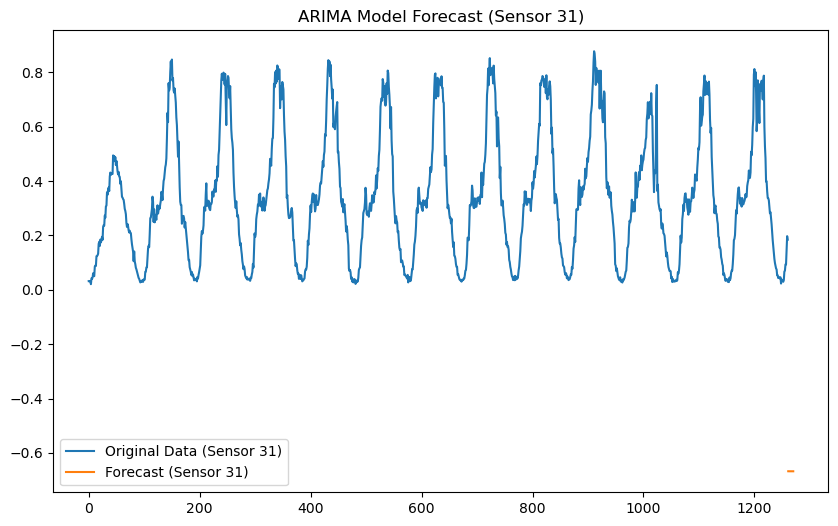

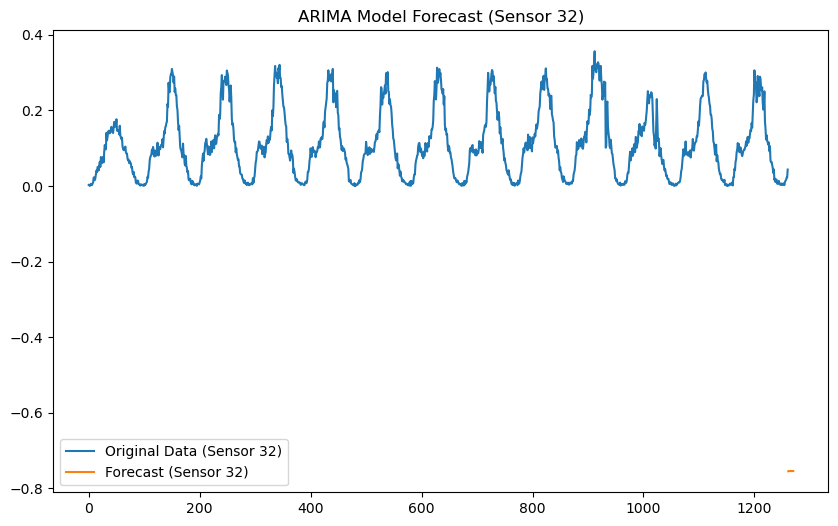

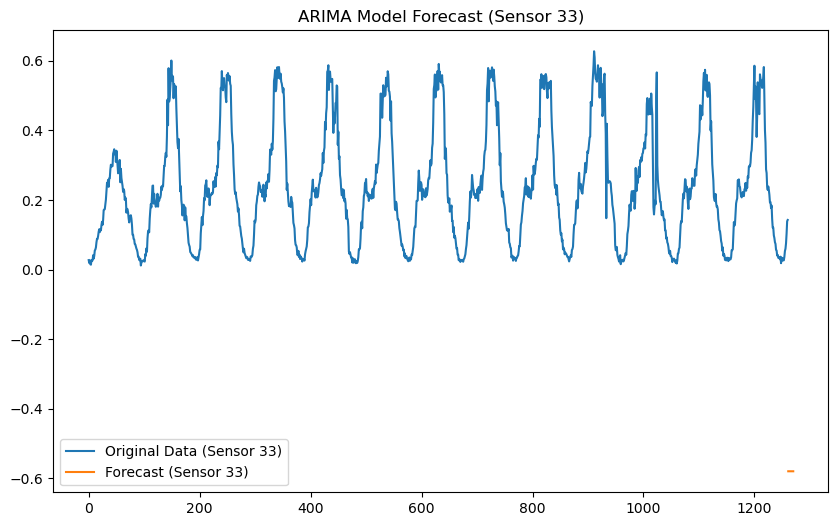

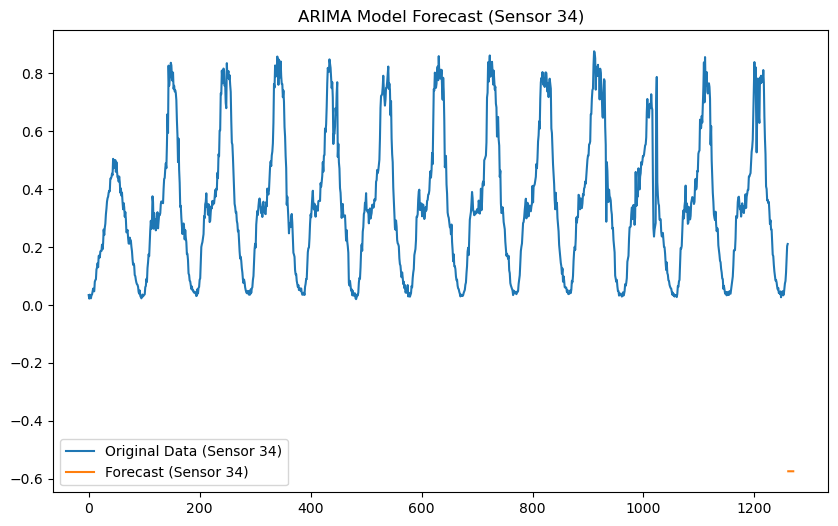

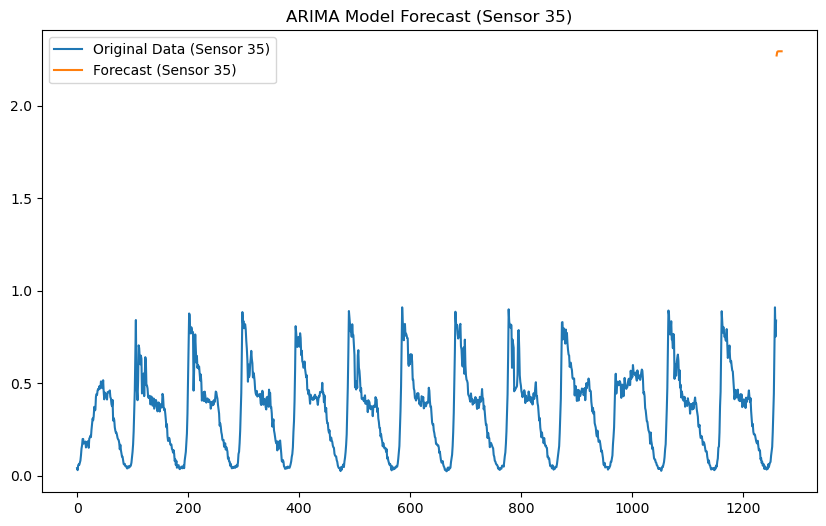

In [25]:
for sensor_index in range(traffic_output_train_df.shape[0]):
    sensor_data = traffic_output_train_df.iloc[sensor_index, :]
    
    # Scale, check stationarity, and difference the data as needed (similar to preprocessing above)
    scaled_data = scaler.fit_transform(sensor_data.values.reshape(-1, 1)).flatten()
    diff_data = np.diff(scaled_data) if not adfuller(scaled_data)[1] <= 0.05 else scaled_data
    
    # Fit ARIMA model
    model = ARIMA(diff_data, order=(1, 1, 0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=10)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sensor_data, label=f'Original Data (Sensor {sensor_index})')
    plt.plot(range(len(sensor_data), len(sensor_data) + 10), forecast, label=f'Forecast (Sensor {sensor_index})')
    plt.legend()
    plt.title(f'ARIMA Model Forecast (Sensor {sensor_index})')
    plt.show()


In [36]:
print(forecast)


28    0.129878
29    0.132935
30    0.131909
31    0.132253
32    0.132137
33    0.132176
34    0.132163
35    0.132168
36    0.132166
37    0.132167
Name: predicted_mean, dtype: float64


In [42]:
# Inverse transform the forecasted values back to the original scale
forecast_original_scale = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()


AttributeError: 'Series' object has no attribute 'reshape'

In [43]:
# Convert the forecasted values to a NumPy array
forecast_array = forecast.values

# Reshape the array to a 2D array (needed for inverse transformation)
forecast_reshaped = forecast_array.reshape(-1, 1)

# Inverse transform the forecasted values back to the original scale
forecast_original_scale = scaler.inverse_transform(forecast_reshaped).flatten()


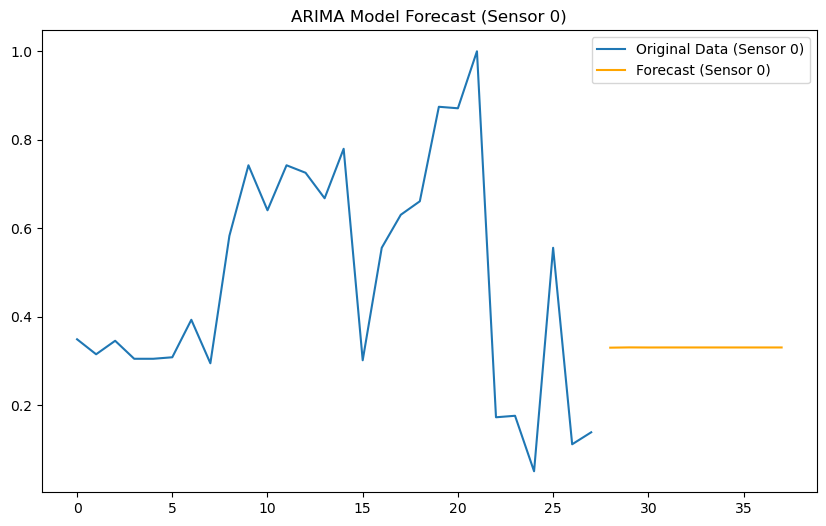

In [39]:
# Plot the original data and the rescaled forecast
plt.figure(figsize=(10, 6))
plt.plot(sensor_data, label='Original Data (Sensor 0)')
plt.plot(range(len(sensor_data), len(sensor_data) + 10), forecast_original_scale, label='Forecast (Sensor 0)', color='orange')
plt.legend()
plt.title('ARIMA Model Forecast (Sensor 0)')
plt.show()


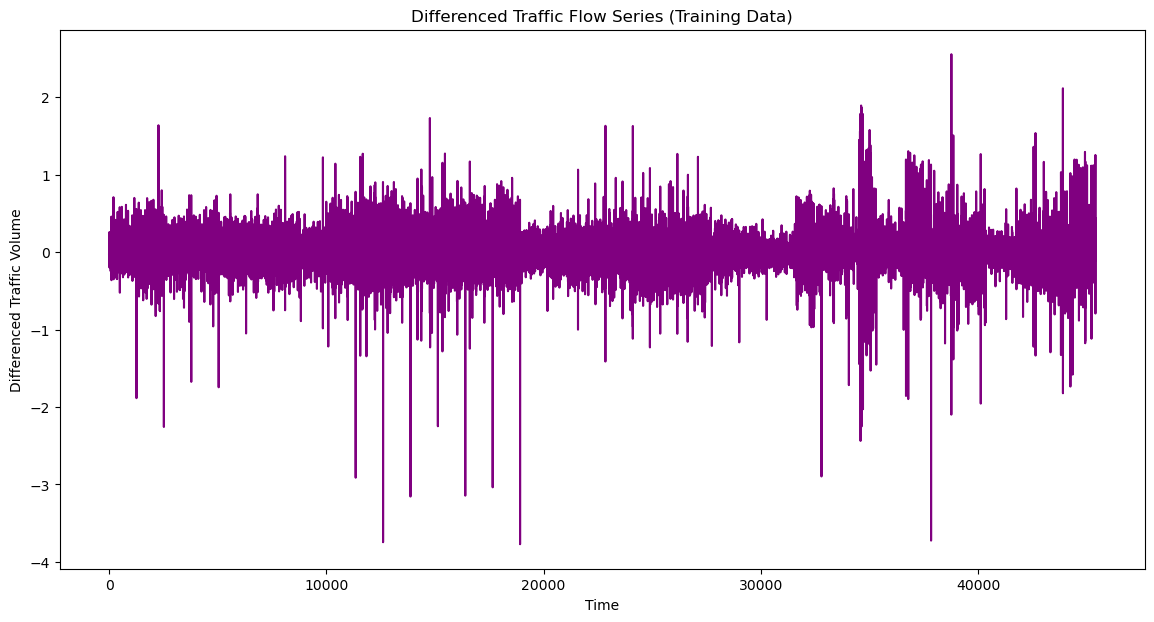

In [31]:
from sklearn.preprocessing import StandardScaler

# Flattening the output for time series modeling
traffic_output_train_flat = traffic_output_train.flatten()
traffic_output_test_flat = traffic_output_test.flatten()

# Scaling the data (if needed for the model)
scaler = StandardScaler()
traffic_output_train_scaled = scaler.fit_transform(traffic_output_train_flat.reshape(-1, 1))
traffic_output_test_scaled = scaler.transform(traffic_output_test_flat.reshape(-1, 1))

# Ensuring stationarity (Differencing if necessary)
diff_traffic_output_train = np.diff(traffic_output_train_scaled.flatten(), n=1)

# Visualize the differenced series to check stationarity
plt.figure(figsize=(14, 7))
plt.plot(diff_traffic_output_train, color='purple')
plt.title('Differenced Traffic Flow Series (Training Data)')
plt.xlabel('Time')
plt.ylabel('Differenced Traffic Volume')
plt.show()


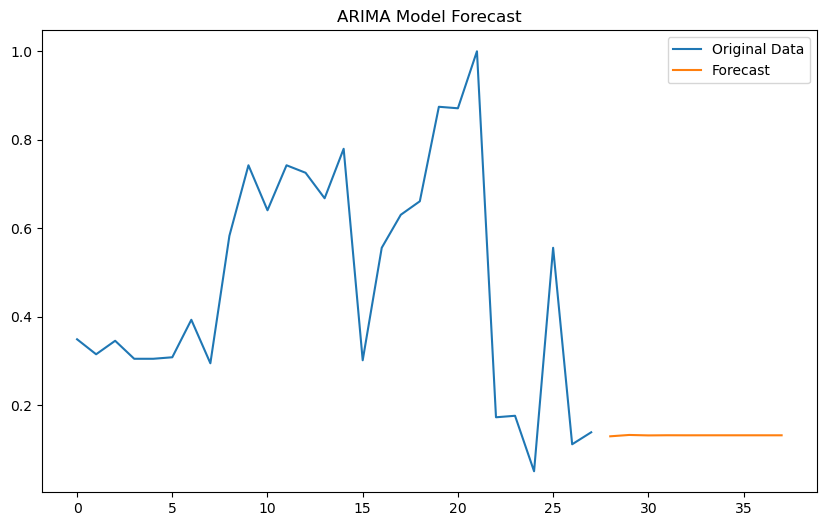

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Select the data for one sensor (e.g., the first one)
sensor_data = train_data.iloc[:, 0]

# Fit the ARIMA model (ARIMA(p,d,q) where p=1, d=1, q=0 as an example)
model = ARIMA(sensor_data, order=(1, 1, 0))
model_fit = model.fit()

# Forecast the next 10 time steps
forecast = model_fit.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(sensor_data, label='Original Data')
plt.plot(range(len(sensor_data), len(sensor_data) + 10), forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()
